In [1]:
%matplotlib inline

import numpy as np
import geopandas as gpd
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
pylab.rcParams['figure.figsize'] =10, 8

## Import the ZIP
First import the shapefile as a zip into a Geopandas dataframe after downloading it from http://geodata.vermont.gov/datasets/VTrans::vt-road-centerline. This saves having to deal with a bunch of small files all over the place but it will take longer for the shapefile to load the first time

In [2]:
vtroad= gpd.read_file('/VT_Road_Centerline.shp', vfs='zip://VT_Road_Centerline.zip')

## Summarize the Data
Since this is not a file I have explored before, I am going to do a sequence of actions that give me a basic idea of what kind of data is in here

In [3]:
vtroad.head()

OBJECTID  SEGMENTID  ARCID  STREETID    PD    PT          SN    ST    SD  \
0         1    23272.0    119   23272.0  None  None  MARSHFIELD    RD  None   
1         2    49357.0     86   49357.0  None  None   MISTLETOE    LN  None   
2         3        NaN     52       NaN  None  None        None  None  None   
3         4     8128.0    336    8128.0  None  None      MYRTLE   AVE  None   
4         5    45750.0     92   45750.0  None  None        MAIN    ST  None   

   GEONAMEID                        ...                                FAID  \
0     3822.0                        ...                          2014043783   
1    12496.0                        ...                          1894343750   
2        NaN                        ...                          2033943716   
3     1186.0                        ...                          2013844000   
4    10384.0                        ...                          1913943756   

  FED_AID Facility_T CREATIONUS DATECREATE  LASTUSER  \
0    0724        2.0       None       None  HMSADMIN   
1    None        NaN       None       None      None   
2    None        NaN       None       None      None   
3    None        NaN       None       None      None   
4    0784        2.0       None       None      None   

                 DATEMODIFI DATECREA_1                DATEMODI_1  \
0  2016-12-15T15:57:47.000Z       None  2016-12-15T20:57:47.000Z   
1                      None       None                      None   
2                      None       None                      None   
3                      None       None                      None   
4                      None       None                      None   

                                            geometry  
0  LINESTRING (505478.4275106315 207152.135936643...  
1  LINESTRING (496609.3173043599 265237.775577430...  
2  LINESTRING (489350.0972996171 54532.0254312726...  
3  LINESTRING (500779.8573073518 188546.195523657...  
4  LINESTRING (433708.6566598935 264330.769676506...  

[5 rows x 98 columns]

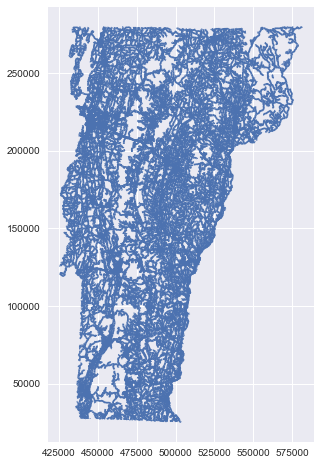

In [4]:
vtroad.plot()

In [5]:
vtroad.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 75230 entries, 0 to 75229
Data columns (total 98 columns):
OBJECTID      75230 non-null int64
SEGMENTID     47830 non-null float64
ARCID         75230 non-null int64
STREETID      47178 non-null float64
PD            2136 non-null object
PT            0 non-null object
SN            48502 non-null object
ST            42503 non-null object
SD            1547 non-null object
GEONAMEID     48517 non-null float64
USEGEONAME    1055 non-null object
PRIMARYNAM    48504 non-null object
ALINAME       7667 non-null object
ALIAS1        4844 non-null object
ALIAS2        2195 non-null object
ALIAS3        53 non-null object
ALIAS4        318 non-null object
ALIAS5        3169 non-null object
COMMENTS      10001 non-null object
SURFACETYP    75230 non-null int64
ONEWAY        75227 non-null object
ADDRESSLOC    1442 non-null object
NO_MSAG       259 non-null object
C1_EXCEPTI    273 non-null object
MCODE         48507 non-null float64
LES

In [6]:
vtroad.describe()

OBJECTID      SEGMENTID         ARCID       STREETID  \
count  75230.000000   47830.000000  75230.000000   47178.000000   
mean   37615.500000   41244.184257    363.654247   34808.921404   
std    21717.174713   41651.438315    363.803409   21819.903111   
min        1.000000       0.000000      1.000000       0.000000   
25%    18808.250000   17569.000000    114.000000   16722.250000   
50%    37615.500000   34891.500000    248.000000   33765.500000   
75%    56422.750000   52442.750000    484.750000   50744.750000   
max    75230.000000  311067.000000   2421.000000  253234.000000   

           GEONAMEID    SURFACETYP         MCODE          LESN          RESN  \
count   48517.000000  75230.000000  48507.000000  48506.000000  48506.000000   
mean    49173.859245      2.866343    624.102707    299.028945    299.013998   
std    113486.514852      2.870911     74.496762    114.359452    114.375882   
min         0.000000      1.000000      0.000000     -1.000000     -1.000000   
25%      8478.000000      1.000000    557.000000    199.000000    199.000000   
50%     16899.000000      2.000000    624.000000    307.500000    307.000000   
75%     24688.000000      3.000000    686.000000    380.000000    380.000000   
max    710091.000000      9.000000    760.000000    673.000000    673.000000   

               LLO_A      ...          ISVISIBLE         FIPS8    RTNUMBER_N  \
count   48690.000000      ...       75228.000000  7.523000e+04  75227.000000   
mean      418.797741      ...           0.991679  5.001557e+07     54.677489   
std      1769.896112      ...           0.090842  8.722069e+03    110.362379   
min         0.000000      ...           0.000000  5.000100e+07      0.000000   
25%         0.000000      ...           1.000000  5.000704e+07      1.000000   
50%        21.000000      ...           1.000000  5.001705e+07     13.000000   
75%       191.750000      ...           1.000000  5.002308e+07     57.000000   
max    127925.000000      ...           1.000000  5.002712e+07    925.000000   

             RDNAME    ISVISIBLE_        FAID_N     FUNCL_OLD    Urban_Code  \
count  7.513800e+04  75230.000000  7.523000e+04  74851.000000  75230.000000   
mean   7.523545e+05      0.887984  1.939341e+09      7.167319  92620.302393   
std    8.389658e+06      0.315389  8.968516e+07      5.873726  24427.943012   
min    0.000000e+00      0.000000 -9.263996e+08      0.000000      0.000000   
25%    7.740000e+03      1.000000  1.854144e+09      0.000000  99999.000000   
50%    1.624050e+04      1.000000  1.954294e+09      9.000000  99999.000000   
75%    2.432975e+04      1.000000  2.014594e+09      9.000000  99999.000000   
max    1.000000e+08      1.000000  2.054995e+09     19.000000  99999.000000   

               FAID    Facility_T  
count  7.523000e+04  19242.000000  
mean   1.939341e+09      2.346690  
std    8.968516e+07      1.087135  
min   -9.263996e+08      0.000000  
25%    1.854144e+09      2.000000  
50%    1.954294e+09      2.000000  
75%    2.014594e+09      2.000000  
max    2.054995e+09      7.000000  

[8 rows x 44 columns]

There is a ton in here that will not be as useful to my work, in this case created dates, last user, those kinds of thing are not as helpful.  However, there are some numerical fields that understanding the distribution might be useful.  

Looking through the documentation at http://vtransmaps.vermont.gov/Maps/Publications/VTrans_Road_Centerline_User_Guide.pdf is helpful though. It is important to note the number of fields that are marked as not completed for this version so it gives a sense of caution before apply any of it in a practical situation.

## Road Direction

For example, PD has Prefix road direction, this tells you which direction the road travels.  
* E = East 
* N = North 
* NE = Northeast
* NW = Northwest
* S = South
* SE = Southeast
* SW = Southwest

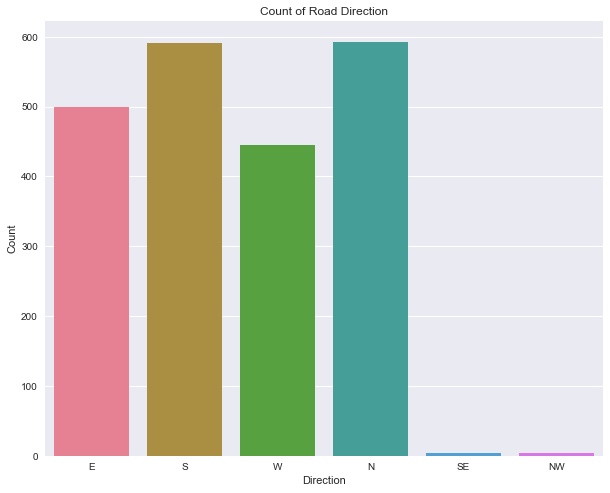

In [7]:
sns.countplot(vtroad['PD'], palette="husl")
plt.title('Count of Road Direction')
plt.xlabel('Direction')
plt.ylabel('Count')
plt.show()

## Surface Type

The surface type of the road; Field values:
* 1 = Paved
* 2 = Gravel
* 3 = Soil or graded and drained earth
* 5 = Unimproved/primitive
* 6 = Impassable or untraveled
* 9 = Unknown

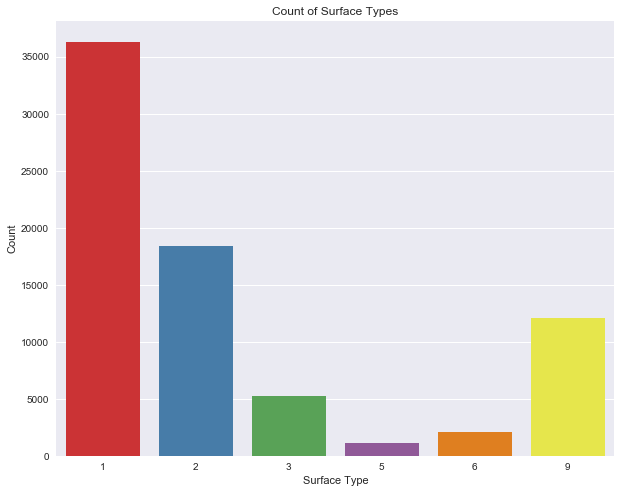

In [8]:
sns.countplot(vtroad['SURFACETYP'], palette="Set1")
plt.title('Count of Surface Types')
plt.xlabel('Surface Type')
plt.ylabel('Count')
plt.show()

In [9]:
types = countviolationdf = vtroad[['SURFACETYP', 'PD']].groupby(['SURFACETYP'], as_index=False).count()
types.columns = ['Type','Count']
types = types.sort_values(by='Count',ascending=0)
types['Percentage'] = types['Count'] / types['Count'].sum()
types.head(6)

Type  Count  Percentage
0     1   1442    0.675094
1     2    474    0.221910
5     9    174    0.081461
2     3     30    0.014045
3     5     14    0.006554
4     6      2    0.000936

So 67% of the roads in the data set are showing as paved, and the remaining 33% are unpaved in some form or another.  8% are just unknown so that may include dirt and pavement.

Now to see all the road segments that have a specific surface type, a conditional statement and a plot should do the trick.

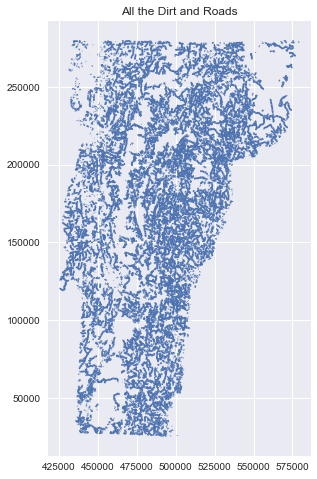

In [10]:
data = vtroad[(vtroad['SURFACETYP'] == 2) | (vtroad['SURFACETYP'] == 3)]
data.plot()
plt.title("All the Dirt and Roads")
plt.show()

## Speed Limits

When I first tried this I found that the speed limit was being stored as a String and the null values were notated as "None" which was not working well with my code. I first had to convert it to a float in order to do some of the graphs below:

In [11]:
vtroad['SPEEDLIMIT'] = np.array(vtroad['SPEEDLIMIT'], dtype=np.float)
pd.unique(vtroad['SPEEDLIMIT'])

array([ nan,  50.,  55.,  65.,  40.,   0.,  35.,  45.,  30.,  25.])

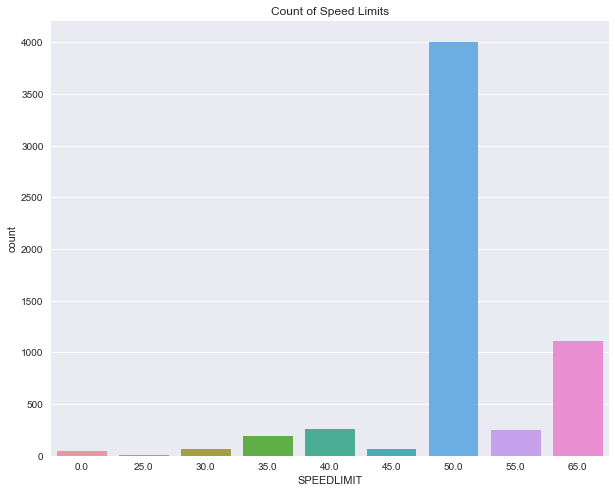

In [12]:
sns.countplot(vtroad['SPEEDLIMIT'])
plt.title('Count of Speed Limits')
plt.show()

In [13]:
# return the number of null values
vtroad.SPEEDLIMIT.isnull().sum()

69231

While there is an obvious leading in speed limits, the amount of null values is quite high. Given the state speed limit is 55 I wonder what is going on here and if those missing values might change the distribution.

## AOTCLASS

Description: This item will hold the official VTrans road class from the VTrans highway maps (see also
the description for RPCCLASS). All arcs must be assigned an AOTCLASS code. AOTCLASS generally
uses the same codes as the RPCCLASS field, except for codes 8 and 9 - some RPCs use 8 to identify
private roads not generally used by the public and 9 to identify private roads in general use by the public,
while VTrans uses 8 to identify private roads not shown on the Town Highway Maps (most private roads)
and 9 to identify private roads shown on the Town Highway Maps.

There are over 90 classifications of the type, but a majority is in only a few. First there was a need to get rid of the smallest numbers and then clarify the lables.

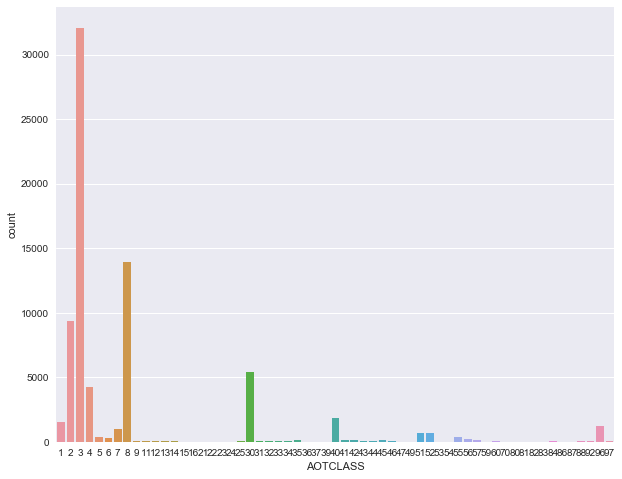

In [14]:
sns.countplot(vtroad['AOTCLASS'])

In [15]:
AOTclass = vtroad[['AOTCLASS', 'PD']].groupby(['AOTCLASS'], as_index=False).count()
AOTclass.columns = ['Type','Count']

# remove all the outliers
AOTclass = AOTclass[(AOTclass['Count'] > 5)]

# Sort and add percentage
AOTclass = AOTclass.sort_values(by='Count', ascending=0)
AOTclass['Percentage'] = AOTclass['Count'] / AOTclass['Count'].sum()

#change from numeric classifications to a text one
AOTclass.loc[(AOTclass['Type'] == 1), 'Type'] = "Town Highway Class 1"
AOTclass.loc[(AOTclass['Type'] == 2), 'Type'] = "Town Highway Class 2"
AOTclass.loc[(AOTclass['Type'] == 3), 'Type'] = "Town Highway Class 3"
AOTclass.loc[(AOTclass['Type'] == 4), 'Type'] = "Town Highway Class 4"
AOTclass.loc[(AOTclass['Type'] == 8), 'Type'] = "Private road"
AOTclass.loc[(AOTclass['Type'] == 30), 'Type'] = "State Highway"
AOTclass.loc[(AOTclass['Type'] == 40), 'Type'] = "US Highway"
AOTclass

Type  Count  Percentage
1   Town Highway Class 2    625    0.295229
2   Town Highway Class 3    625    0.295229
0   Town Highway Class 1    278    0.131318
7           Private road    259    0.122343
20         State Highway    183    0.086443
29            US Highway    134    0.063297
3   Town Highway Class 4     13    0.006141

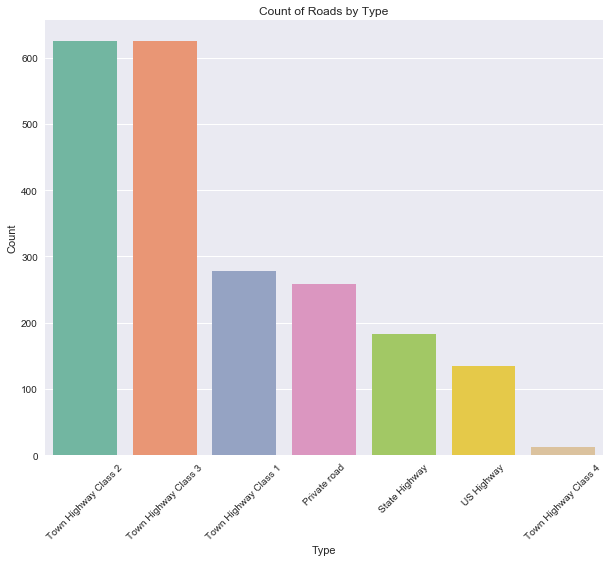

In [16]:
sns.barplot(x='Type', y='Count', data=AOTclass, palette="Set2")
plt.title('Count of Roads by Type')
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## Subsetting the Data

When trying to do some of the more interesting visualizations with 75,000 datapoints it can choke a bit so sometimes it helps to cut out a section and do some exploritory work on a smaller section.  How you cut it can make a huge difference on what you find, I will do it two ways below.

In [17]:
vtroad.shape

(75230, 98)

In [18]:
# takes the first 1,000 rows of data
truncroad = vtroad[0:1000]
truncroad.shape

(1000, 98)

In [21]:
truncroad.describe()

OBJECTID      SEGMENTID       ARCID      STREETID      GEONAMEID  \
count  1000.000000     662.000000  1000.00000    652.000000     672.000000   
mean    500.500000   43342.580060   363.28200  36710.049080   51162.497024   
std     288.819436   41079.226426   366.87207  20918.167503  115850.300330   
min       1.000000      15.000000     1.00000      0.000000      22.000000   
25%     250.750000   20704.250000   118.00000  19618.750000    9601.750000   
50%     500.500000   38530.000000   240.00000  36922.000000   17268.500000   
75%     750.250000   53508.750000   486.00000  52259.250000   25978.750000   
max    1000.000000  254924.000000  2361.00000  91717.000000  536314.000000   

        SURFACETYP       MCODE        LESN        RESN         LLO_A  \
count  1000.000000  671.000000  671.000000  671.000000    674.000000   
mean      2.866000  626.415797  303.865872  303.865872    463.566766   
std       2.845723   71.584925  117.604497  117.604497   2251.533408   
min       1.000000  500.000000   -1.000000   -1.000000      0.000000   
25%       1.000000  566.000000  199.000000  199.000000      0.000000   
50%       2.000000  626.000000  326.000000  326.000000     23.000000   
75%       3.000000  686.000000  390.000000  390.000000    212.750000   
max       9.000000  760.000000  648.000000  648.000000  53559.000000   

          ...        ISVISIBLE         FIPS8   RTNUMBER_N        RDNAME  \
count     ...      1000.000000  1.000000e+03  1000.000000  1.000000e+03   
mean      ...         0.992000  5.001562e+07    52.917700  1.044905e+06   
std       ...         0.089129  8.507861e+03   103.667568  9.950941e+06   
min       ...         0.000000  5.000100e+07     0.000000  0.000000e+00   
25%       ...         1.000000  5.000705e+07     1.000000  8.614500e+03   
50%       ...         1.000000  5.001704e+07    13.000000  1.626500e+04   
75%       ...         1.000000  5.002306e+07    56.000000  2.506250e+04   
max       ...         1.000000  5.002712e+07   913.000000  1.000000e+08   

        ISVISIBLE_        FAID_N   FUNCL_OLD    Urban_Code          FAID  \
count  1000.000000  1.000000e+03  994.000000   1000.000000  1.000000e+03   
mean      0.894000  1.939969e+09    7.368209  91792.171000  1.939969e+09   
std       0.307992  8.507858e+07    6.027566  25641.700091  8.507858e+07   
min       0.000000  1.793844e+09    0.000000  11755.000000  1.793844e+09   
25%       1.000000  1.854295e+09    0.000000  99999.000000  1.854295e+09   
50%       1.000000  1.954244e+09    9.000000  99999.000000  1.954244e+09   
75%       1.000000  2.014344e+09    9.000000  99999.000000  2.014344e+09   
max       1.000000  2.054994e+09   19.000000  99999.000000  2.054994e+09   

       Facility_T  
count  229.000000  
mean     2.371179  
std      1.157451  
min      0.000000  
25%      2.000000  
50%      2.000000  
75%      2.000000  
max      7.000000  

[8 rows x 45 columns]

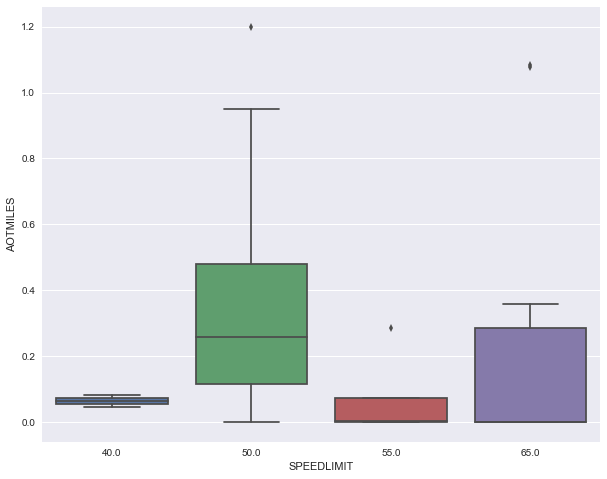

In [27]:
sns.boxplot(x='SPEEDLIMIT', y='AOTMILES', data=truncroad)

The boxchart looks interesting by there should be no relationship between the AOTMiles and the speedlimit so depsite looking interesting there are no useful conclusions. As there are a large number of null values in various fields instead I am going to try to subset for values that are not null.

In [33]:
speed =  vtroad[(vtroad['SPEEDLIMIT'].notnull())]
speed.shape

(5954, 98)

In [37]:
pd.unique(speed['SCENICBYWA'])

array([   0,  100,  600,  400,  200,  900,  800,  500,  300,  700, 1000], dtype=int64)

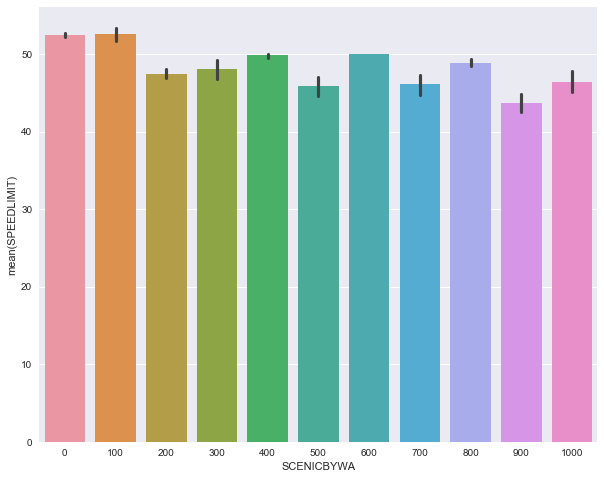

In [39]:
sns.barplot(x='SCENICBYWA', y='SPEEDLIMIT', data=speeddf)
plt.title('Mean Speed Limit by Scenic Byway')
plt.show()

This is just a light demo of extracting charts and visualizations from a geospatial dataset. Much of the data acts as a normal data frame with the addition of geometry.  There are a massive number of data sets in the open data portal, the only thing to do is to explore them!